# Description
In this notebook we are exploring the idea of dimensionality reduction using the technique called pricipal component analysis. The code is inspired partly by the [Medium post](https://medium.com/@sebastiannorena/pca-principal-components-analysis-applied-to-images-of-faces-d2fc2c083371) and the dataset of images is from [Kaggle](
https://www.kaggle.com/datasets/ashwingupta3012/human-faces).

# Preparation

In [50]:
# imports
from PIL import Image
import os, sys
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [51]:
# read, resize and rename all the images, this was done with the original images, but those are now deleted
# path = "/home/michal/github/eigenfaces/humans"
# new_path = "/home/michal/github/eigenfaces/resized/"
# dirs = os.listdir(path)

# naming_index = 0

# for item in dirs:

#     if naming_index > 999: # only collect 1000 images
#         break

#     if os.path.isfile(path + "/" + item):
#         try:
#             im = Image.open(path + "/" + item)
#             imResize = im.resize((200,200), Image.ANTIALIAS)
#             imResize.save(new_path  + str(naming_index) + '.jpg', 'JPEG', quality=90)
#             naming_index += 1
#         except:
#             # just a catch in case some of the files are corrupted
#             print("This image is faulty")


In [52]:
# load all the images into one array
dirs = os.listdir(new_path)

array = []

for item in dirs:
    if os.path.isfile(new_path + "/" + item):
        im = cv2.imread(new_path + "/" + item, cv2.IMREAD_GRAYSCALE)
        array.append(im.flatten())

images = np.array(array)

In [53]:
# check the shape of the new array
images.shape

(1000, 40000)

In [54]:
# take PCA that explains 99.9% of the variance
faces_pca = PCA(n_components=0.999)
faces_pca.fit(images)

PCA(n_components=0.999)

In [55]:
# check the number of extracted components
len(faces_pca.components_)

771

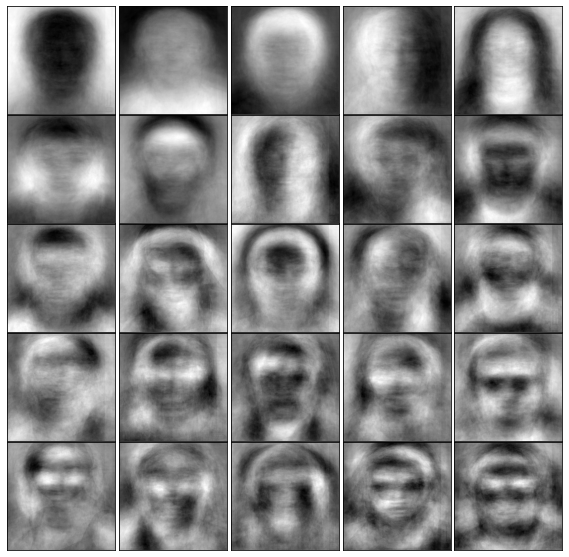

In [58]:
# plot first 25 of the eigenfaces
fig, axes = plt.subplots(5,5, figsize=(10, 10), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(faces_pca.components_[i].reshape(200, 200),cmap="gray")

In [ ]:
# image cropping util
def crop_image(original_image):
    width, height = original_image.size
    crop_box = (
        width // 4,
        height // 4,
        width * 3 // 4,
        height * 3 // 4
    )
    cropped_image = original_image.crop(crop_box)
    return cropped_image

In [59]:
# load my image, crop and save it, resize to 200 by 200, and load colorless
orginal_image = Image.open("/home/michal/github/eigenfaces/my_photo.jpeg")
cropped_image = crop_image(orginal_image)
resized_image = cropped_image.resize((200,200), Image.ANTIALIAS)
resized_image.save("/home/michal/github/eigenfaces/my_photo_resized.jpeg", 'JPEG', quality=90)

In [63]:
def project_using_n_eigenfaces(n, image):
    # select first n components
    used_components = faces_pca.components_[:n]
    # calculate the weights by projecting onto each component
    weights = np.dot(image, used_components.T)
    # calculate the projection as a weighted sum
    projection = np.dot(weights, used_components)
    # reshape to make it a picture again
    projection = projection.reshape(200, 200)
    return projection

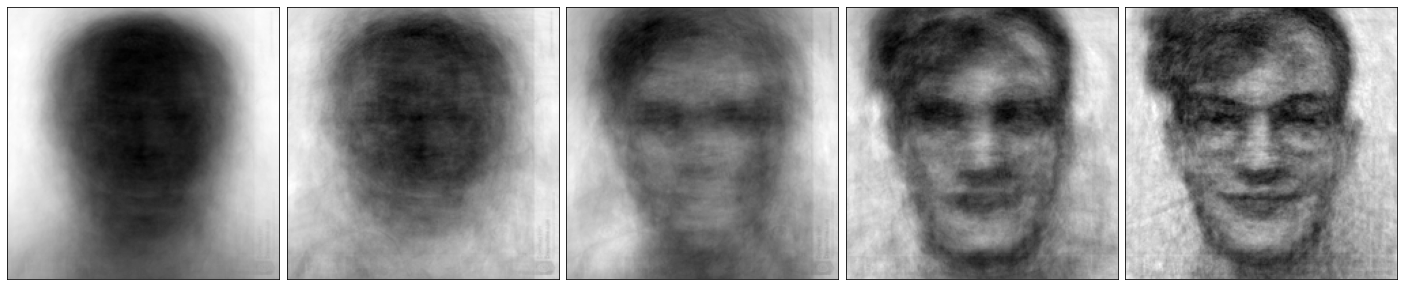

In [72]:
im = cv2.imread("/home/michal/github/eigenfaces/my_photo_resized.jpeg", cv2.IMREAD_GRAYSCALE).flatten()
fig, axes = plt.subplots(1,5, figsize=(25, 5), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.01, wspace=0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(project_using_n_eigenfaces(5**i,im), cmap="gray")